In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import pylab
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import DBSCAN

In [16]:
df = pd.read_csv("Customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [18]:
X = df.values[:,1:]
X = np.nan_to_num(X)
df_dataSet = StandardScaler().fit_transform(X)
df_dataSet

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

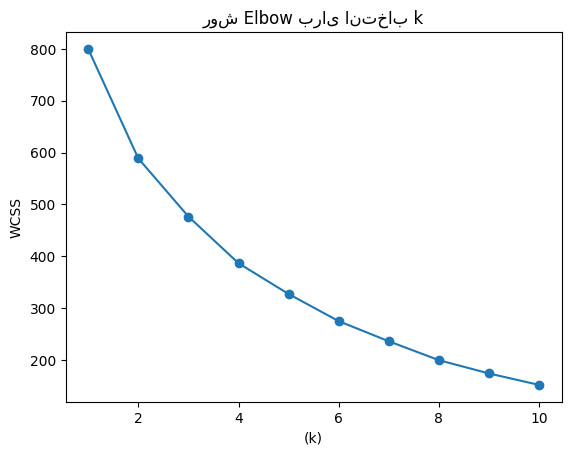

In [19]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=30, max_iter=500, init='k-means++')
    kmeans.fit(df_dataSet)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('(k)')
plt.ylabel('WCSS')
plt.title('روش Elbow برای انتخاب k')
plt.show()

In [25]:
clusterNum = 4
k_means = KMeans(init="k-means++", n_clusters=clusterNum, n_init=30, max_iter=500, random_state=42)
k_means.fit(df_dataSet)
labels = k_means.labels_
print(labels)
score = silhouette_score(df_dataSet, labels)
print(score)

[0 0 3 1 1 1 3 1 2 1 2 1 3 1 2 0 3 0 2 1 2 0 3 0 3 0 3 0 3 1 2 1 2 0 3 1 3
 1 3 1 3 0 2 1 3 1 3 1 1 1 3 0 1 2 3 2 3 2 1 2 2 0 3 3 2 0 3 3 0 1 2 3 3 3
 2 0 3 2 1 3 2 0 2 3 1 2 3 1 1 3 3 0 2 3 1 0 3 1 2 0 1 3 2 0 2 1 3 2 2 2 2
 1 3 0 1 1 3 3 3 3 0 3 1 0 1 1 2 0 2 0 2 0 1 1 2 1 3 0 2 1 3 0 1 1 2 0 2 1
 3 0 2 0 3 1 3 1 2 1 2 1 3 1 2 1 2 1 2 1 3 0 2 0 2 0 3 1 2 0 2 0 3 1 2 1 3
 0 3 0 3 1 3 1 2 1 3 1 3 0 2 0]
0.3016237438985174


<h1>hiriciall</h1>

In [26]:
dist_matrix = euclidean_distances(df_dataSet,df_dataSet) 
print(dist_matrix)

[[0.         1.63681098 2.38878538 ... 4.54611614 4.81867651 5.02250496]
 [1.63681098 0.         3.54154808 ... 4.3182849  5.31878915 4.70189264]
 [2.38878538 3.54154808 0.         ... 5.42195122 5.13299938 5.90251765]
 ...
 [4.54611614 4.3182849  5.42195122 ... 0.         2.21418015 0.5647686 ]
 [4.81867651 5.31878915 5.13299938 ... 2.21418015 0.         2.5274803 ]
 [5.02250496 4.70189264 5.90251765 ... 0.5647686  2.5274803  0.        ]]


In [27]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\Webhouse\AppData\Local\Temp\ipykernel_7736\1633147189.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


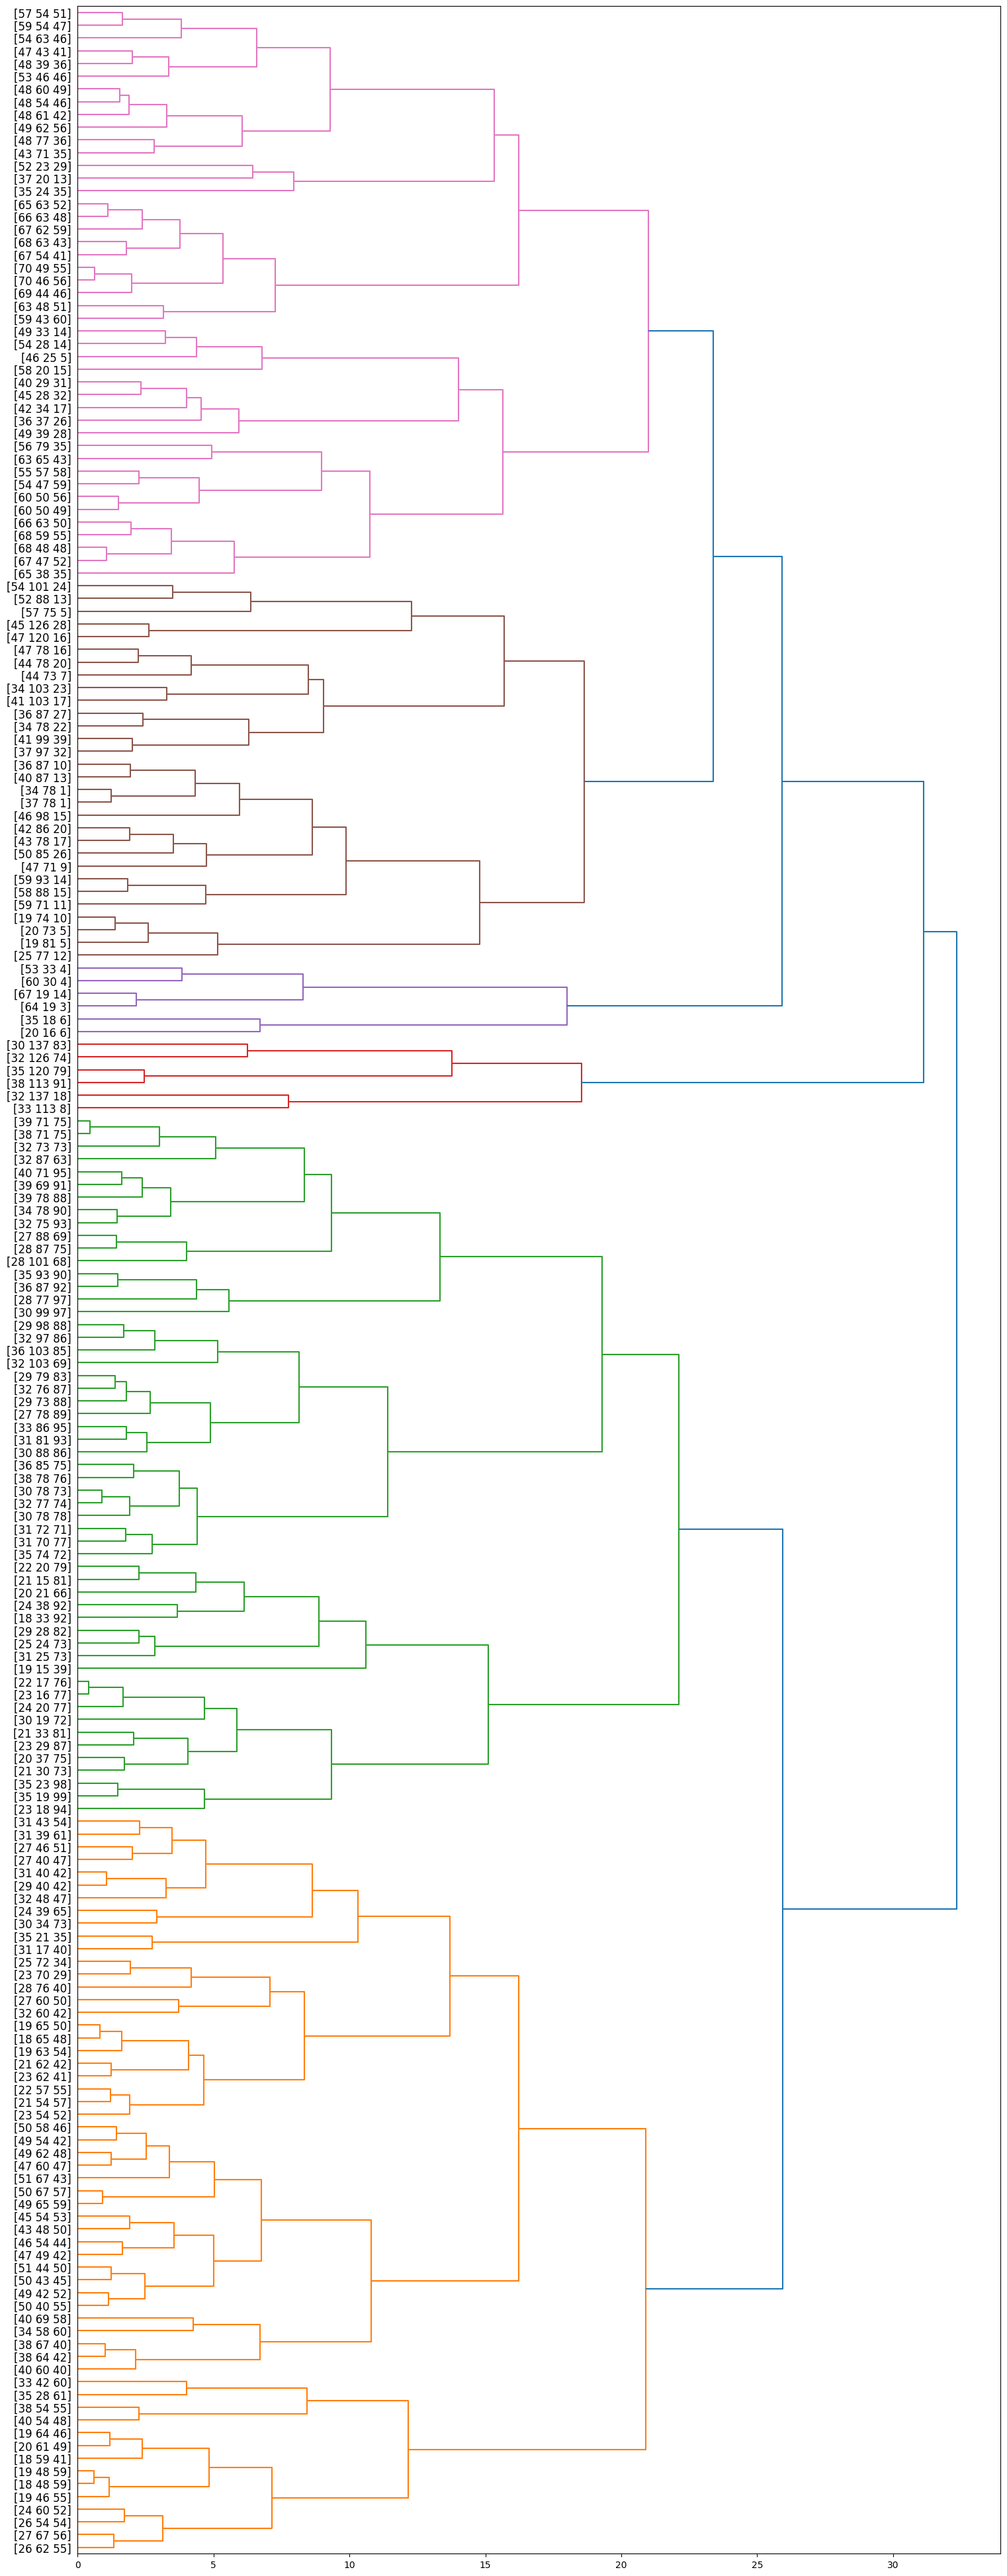

In [28]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['Age'][id], df['Annual Income (k$)'][id], int(float(df['Spending Score (1-100)'][id])) )
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [29]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(df_dataSet)

agglom.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 5, 0, 5, 0, 2, 0, 4, 0, 4, 0, 5, 0, 4, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 5, 0, 5, 0, 2, 0, 2, 0, 2, 0, 2, 0, 5, 4,
       2, 0, 2, 4, 4, 4, 2, 0, 4, 5, 2, 5, 2, 5, 4, 5, 5, 0, 2, 2, 5, 0,
       2, 2, 0, 4, 5, 2, 2, 2, 5, 0, 2, 0, 4, 2, 5, 0, 5, 2, 4, 5, 2, 4,
       4, 2, 2, 0, 5, 4, 4, 0, 2, 4, 5, 0, 4, 2, 5, 0, 5, 4, 2, 5, 5, 5,
       5, 4, 4, 0, 4, 4, 2, 2, 2, 2, 0, 4, 4, 3, 4, 3, 5, 3, 1, 3, 1, 3,
       4, 3, 1, 3, 1, 3, 1, 3, 2, 3, 4, 3, 1, 3, 5, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [30]:
score2 = silhouette_score(df_dataSet, agglom.labels_)
print(score2)


0.2838903216440338


<h1>DBSCAN</h1>

DBSCAN Labels: [ 2  0  1  0  2  0  1 -1  1  0  1 -1  1  0  1  0  2  0  2 -1  2  0  1  0
  1  0  2  0  2  0  1  0  1 -1  1  0  1  0 -1  0  3 -1  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  4  3  4  3  4  5  4  5  4  3  4  5  4  5  4  5  4  5  4  3  4
  5  4  3  4  5  4  5  4  5  4  5  4  5  4  5  4  3  4  5  4  5  4  5  4
  5 -1  5  4  5  4  5  4  5  4  5  4 -1  4  5  4 -1 -1 -1 -1 -1  4 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]
تعداد خوشه‌ها: 5
Silhouette Score (DBSCAN): 0.436768048377307


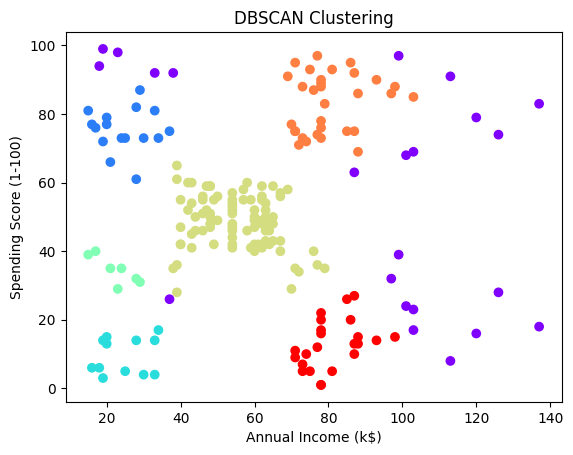

In [33]:
df = pd.read_csv("Customer.csv")

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
X_scaled = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.35, min_samples=5).fit(X_scaled)
labels = db.labels_
print("DBSCAN Labels:", labels)
n_clusters = 5
print("تعداد خوشه‌ها:", n_clusters)

if n_clusters > 1:
    score = silhouette_score(X_scaled, labels)
    print("Silhouette Score (DBSCAN):", score)
else:
    print("Silhouette Score قابل محاسبه نیست (فقط یک خوشه یا همه داده‌ها Noise شدن)")

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels, cmap='rainbow')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("DBSCAN Clustering")
plt.show()